In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from dateutil.parser import parse
import re as re

### Some initial snooping & looking around ###

In [3]:
met = pd.read_csv("MetObjects.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7,8,9,10,11,18,27,28,29,30,31,32,33,34,35,36,37,39) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
met.head(3)

Object Number  Is Highlight  Is Public Domain  Object ID  \
0    1979.486.1         False             False          1   
1    1980.264.5         False             False          2   
2      67.265.9         False             False          3   

                 Department Object Name                         Title Culture  \
0  American Decorative Arts        Coin  One-dollar Liberty Head Coin     NaN   
1  American Decorative Arts        Coin  Ten-dollar Liberty Head Coin     NaN   
2  American Decorative Arts        Coin    Two-and-a-Half Dollar Coin     NaN   

  Period Dynasty  ... Subregion Locale Locus Excavation River Classification  \
0    NaN     NaN  ...       NaN    NaN   NaN        NaN   NaN          Metal   
1    NaN     NaN  ...       NaN    NaN   NaN        NaN   NaN          Metal   
2    NaN     NaN  ...       NaN    NaN   NaN        NaN   NaN          Metal   

  Rights and Reproduction                                     Link Resource  \
0                     NaN  http://www.metmuseum.org/art/collection/search/1   
1                     NaN  http://www.metmuseum.org/art/collection/search/2   
2                     NaN  http://www.metmuseum.org/art/collection/search/3   

         Metadata Date                                Repository  
0  4/3/2017 8:00:08 AM  Metropolitan Museum of Art, New York, NY  
1  4/3/2017 8:00:08 AM  Metropolitan Museum of Art, New York, NY  
2  4/3/2017 8:00:08 AM  Metropolitan Museum of Art, New York, NY  

[3 rows x 43 columns]

In [5]:
met.shape

(448203, 43)

In [6]:
met.columns

Index(['Object Number', 'Is Highlight', 'Is Public Domain', 'Object ID',
       'Department', 'Object Name', 'Title', 'Culture', 'Period', 'Dynasty',
       'Reign', 'Portfolio', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Metadata Date',
       'Repository'],
      dtype='object')

In [7]:
met.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448203 entries, 0 to 448202
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Object Number            448203 non-null  object
 1   Is Highlight             448203 non-null  bool  
 2   Is Public Domain         448203 non-null  bool  
 3   Object ID                448203 non-null  int64 
 4   Department               448203 non-null  object
 5   Object Name              445568 non-null  object
 6   Title                    416906 non-null  object
 7   Culture                  186518 non-null  object
 8   Period                   71882 non-null   object
 9   Dynasty                  23018 non-null   object
 10  Reign                    10817 non-null   object
 11  Portfolio                20370 non-null   object
 12  Artist Role              259909 non-null  object
 13  Artist Prefix            88928 non-null   object
 14  Artist Display Name 

In [8]:
met.iloc[0]

Object Number                                                     1979.486.1
Is Highlight                                                           False
Is Public Domain                                                       False
Object ID                                                                  1
Department                                          American Decorative Arts
Object Name                                                             Coin
Title                                           One-dollar Liberty Head Coin
Culture                                                                  NaN
Period                                                                   NaN
Dynasty                                                                  NaN
Reign                                                                    NaN
Portfolio                                                                NaN
Artist Role                                                            Maker

In [9]:
met.nunique(axis = 0)

Object Number              445627
Is Highlight                    2
Is Public Domain                2
Object ID                  448203
Department                     20
Object Name                 27037
Title                      225554
Culture                      7101
Period                       1695
Dynasty                       341
Reign                         356
Portfolio                    2908
Artist Role                  5664
Artist Prefix                5290
Artist Display Name         56390
Artist Display Bio          40951
Artist Suffix                1644
Artist Alpha Sort           56400
Artist Nationality           3811
Artist Begin Date           20795
Artist End Date             21229
Object Date                 29630
Object Begin Date            2074
Object End Date              2033
Medium                      61445
Dimensions                 241145
Credit Line                 37116
Geography Type                125
City                         2495
State         

# Target #

**The target: 'Is Highlight'**

In [10]:
met["Is Highlight"].value_counts()

False    446344
True       1859
Name: Is Highlight, dtype: int64

In [59]:
#Will be important to know the ratio between the target:non-target classes. 
target_ratio = len(met[met["Is Highlight"]])/len(met)
target_ratio

0.004147674156576373

In [12]:
mask = met["Is Highlight"]==True

In [13]:
metHighlight = met[mask]
metHighlight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1859 entries, 167 to 447905
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Object Number            1859 non-null   object
 1   Is Highlight             1859 non-null   bool  
 2   Is Public Domain         1859 non-null   bool  
 3   Object ID                1859 non-null   int64 
 4   Department               1859 non-null   object
 5   Object Name              1703 non-null   object
 6   Title                    1834 non-null   object
 7   Culture                  910 non-null    object
 8   Period                   350 non-null    object
 9   Dynasty                  94 non-null     object
 10  Reign                    69 non-null     object
 11  Portfolio                4 non-null      object
 12  Artist Role              1089 non-null   object
 13  Artist Prefix            172 non-null    object
 14  Artist Display Name      1111 non-nu

In [14]:
metHighlight.Department.value_counts()

The Libraries                                155
Islamic Art                                  120
Modern and Contemporary Art                  116
Greek and Roman Art                          115
Egyptian Art                                 114
Photographs                                  113
Costume Institute                            107
American Paintings and Sculpture             107
Musical Instruments                          105
Arts of Africa, Oceania, and the Americas    104
European Paintings                           100
Robert Lehman Collection                      98
European Sculpture and Decorative Arts        82
Ancient Near Eastern Art                      75
American Decorative Arts                      65
Drawings and Prints                           61
The Cloisters                                 59
Asian Art                                     55
Medieval Art                                  54
Arms and Armor                                54
Name: Department, dt

In [15]:
libraries = metHighlight[metHighlight.Department == "The Libraries"]
libraries.iloc[50:100, 13:29]

Artist Prefix  \
413144                                     Chez   
413440                                 Appresso   
413451                                      NaN   
413583                                      NaN   
413591                                      NaN   
413657                                      NaN   
414109                                     Chez   
414122                                      NaN   
414307                                      NaN   
414342                                      NaN   
414403                                      NaN   
414404                                      NaN   
414406                                      NaN   
414417                                      NaN   
414419                                     Chez   
414551                                      NaN   
414552                                      NaN   
414561                                     Chez   
414570                                      NaN   
414579                                      NaN   
414583                                      NaN   
414652                                      NaN   
414660                                     Chez   
414674                                      NaN   
414686                                      NaN   
414688                                     Chez   
414690                                       De   
414691                 After|After|After|Presso   
414797                                     Chez   
414798                                      NaN   
414824                                      NaN   
414835                                      NaN   
414836                                      NaN   
414837                      Engravings drawn by   
414840                                      NaN   
414843                                      NaN   
414845                                      NaN   
414846                                      NaN   
414847                   De l'imprimerie de|Par   
414850  Erroneously attributed to|Aux depens de   
415024                                      NaN   
415025                                      NaN   
415026                                      NaN   
415027                                      NaN   
415028                                      NaN   
415029                                      NaN   
415096                                      NaN   
422584                                      NaN   
422586                                      NaN   
422593                                      NaN   

                                      Artist Display Name  \
413144                                           Marcilly   
413440  Alberto Lavezzola|Girolamo Garofolo|Giuseppe B...   
413451         M. (Guillaume de) Lavaur|Petronius Arbiter   
413583  Pierre Pithou|Sulpicia|Persius|Robert Estienne...   
413591                                                NaN   
413657       Laurent Charles d' Houry|Imprimerie de Testu   
414109                           La Veuve Besongne & Fils   
414122  Tadamasa Hayashi|De Vinne Press|Heber R. Bisho...   
414307                           Laurent Charles d' Houry   
414342                           Laurent Charles d' Houry   
414403                           Laurent Charles d' Houry   
414404                                                NaN   
414406                                        Chez Jubert   
414417  Barbou|Jean Monnet|Anne Gabriel Meusnier de Qu...   
414419  François de Paule Latapie|Thomas Whately|Charl...   
414551  François de Salignac de La Mothe-Fénelon|Charl...   
414552  François Ambroise Didot|Josiah W. (Josiah Will...   
414561                           Catholic Church|Langlois   
414570                           Catholic Church|Baudouin   
414579                                                NaN   
414583                           Baron de Sparre|Padeloup   
414652                                   Pierre de Goesin   
414660               La Veuve

In [16]:
metHighlight.iloc[200:250, 4:-4]

Department                                        Object Name  \
20294  Arms and Armor                                              Sword   
20322  Arms and Armor                                             Rapier   
20323  Arms and Armor  Cased set of a flintlock rifle, a pair of pist...   
20327  Arms and Armor                                      Flintlock gun   
20360  Arms and Armor                                    Helmet (Sallet)   
20367  Arms and Armor                               Dagger with scabbard   
20386  Arms and Armor                          Pair of flintlock pistols   
20389  Arms and Armor                                      Costume armor   
20395  Arms and Armor                                              Armor   
20406  Arms and Armor                         Blade for a dagger (Tantō)   
20411  Arms and Armor                              Short sword (Yatagan)   
20415  Arms and Armor       Double-barrel breech-loading pinfire shotgun   
20418  Arms and Armor                                Percussion revolver   
20432  Arms and Armor                                     Armor (Gusoku)   
20559  Arms and Armor                                         Manuscript   
22792  Arms and Armor  Blades and mountings for a pair of swords (Dai...   
22793  Arms and Armor                        Portions of a costume armor   
22794  Arms and Armor                        Burgonet with falling buffe   
22795  Arms and Armor            Harquebusier's armor with buff coat\r\n   
22922  Arms and Armor                                             Helmet   
30117  Arms and Armor                                Sword with scabbard   
30186  Arms and Armor                                    Armor garniture   
30379       Asian Art                                     Hanging scroll   
30478       Asian Art                                              Album   
31485       Asian Art                                              Print   
32078       Asian Art                                  Ceremonial object   
32119       Asian Art                                              Folio   
32132       Asian Art                                           Painting   
32269       Asian Art                                              Folio   
32445       Asian Art                                             Statue   
32473       Asian Art                                             Figure   
32507       Asian Art                                             Figure   
32647       Asian Art                                             Figure   
32769       Asian Art                                             Yaksha   
32869       Asian Art                                             Figure   
32926       Asian Art                                              Torso   
33347       Asian Art                                             Figure   
33855       Asian Art                                            Pendant   
33867       Asian Art                                               Bowl   
33882       Asian Art                                                Jar   
33884       Asian Art                                         Handscroll   
33912       Asian Art                                             Figure   
33937       Asian Art                                              Panel   
33942       Asian Art                                             Tangka   
34065       Asian Art                                         Handscroll   
34079       Asian Art                                         Handscroll   
34082       Asian Art                                         Handscroll   
34097       Asian Art                                         Handscroll   
34116       Asian Art                                        Covered box   
34198       Asian Art                                     Hanging scroll   

                                                   Title  \
20294                                              Sword   
20322  Rapier 

In [17]:
metHighlight.iloc[200:250, :]

Object Number  Is Highlight  Is Public Domain  \
20294                               55.46.1          True              True   
20322                               1970.77          True              True   
20323                         1970.179.1a–q          True              True   
20327                              1972.223          True              True   
20360                              1983.413          True              True   
20367                              1984.332          True              True   
20386                        1986.265.1, .2          True              True   
20389                          1988.65.1–.2          True              True   
20395                                1989.3          True              True   
20406                          1991.373a, b          True              True   
20411                               1993.14          True              True   
20415                              1993.415          True              True   
20418                              1995.336          True              True   
20432                              2001.642          True              True   
20559                                22.229          True              True   
22792               36.120.417a, b, .418a–c          True              True   
22793  24.179; 26.188.1, .2; 29.158.363a, b          True              True   
22794                      04.3.217; 22.140          True              True   
22795               15.113.1–.5; 29.158.885          True              True   
22922                             04.3.456a          True              True   
30117                             2009.8a–c          True              True   
30186    19.131.1a–r, t–w, .2a–c; 27.183.16          True              True   
30379                               14.76.6          True              True   
30478                           1981.4.1a–o          True              True   
31485                                 JP698          True              True   
32078                              1993.525          True              True   
32119                              1992.359          True              True   
32132                              1987.144          True              True   
32269                              57.185.2          True              True   
32445                              1984.296          True              True   
32473                              1977.241          True              True   
32507                                1979.6          True              True   
32647                              1986.498          True              True   
32769                              1988.354          True              True   
32869                              1992.131          True              True   
32926                              1995.419          True              True   
33347                              1988.355          True              True   
33855                           1985.214.99          True              True   
33867                              18.56.36          True              True   
33882                              37.191.1          True              True   
33884                              1981.276          True              True   
33912                          1975.268.155          True              True   
33937                              1987.275          True              True   
33942                              1989.140          True              True   
34065                               1977.78          True              True   
34079                            1973.120.1          True              True   
34082                            1989.363.4          True              True   
34097                              1981.278          True              True   
34116                         25.215.41a, b          True              True   
34198                                41.138          True              True   



- Not a lot of the "Country" info is entered in the "Modern and Contemporary Art" department, although those are known values. That's a bit worrying and might make us question whether to include the 'Country' feature. 
- But on the other hand, the same info is entered for the "Musical Instruments" department. Also the "Islamic Art" department. 
- "Egyptian Art" Department has a lot of info on "Period" & "Dynasty" & "Region" features. Also: "Excavation" feature, which is quite interesting!
- "Medieval Art" has "Culture" feature with quite a bit non-null values. 
- "European Paitings" also seems to have good info on: "Object Name". Most of the "Artist Role" values are entered in this department but either they are a generic "Artist" or a list of roles aggregated together (entered as a datatype of string). "Drawings and Prints" department has a pretty similar situation. "Photographs" department joins this canon. "American Paintings and Sculpture" as well. 
- "Arts of Africa, Oceania, and the Americas" department has quiet a few fields filled in: "State" & "County" & "Country" & "Culture". 
- "Greek and Roman Art" also has many fields filled in: " Culture" & "Period"
- "Arts of Africa, Oceania, and the Americas" & "Costume Institute" & "Arms and Armor" & "American Decorative Arts" departments have many of the values for "Culture" filled in. 

# Analysis for Feature Selection #

### Helper Functions for analysis ###

Function for plotting features: 

In [18]:
def bar_plot_features(df, feature, sample_size = 1000):
    sample = df.sample(sample_size, random_state = 0)
    g = sns.countplot(x = feature, data = sample, hue = 'Is Highlight')
    g.set_xticklabels(g.get_xticklabels(), rotation=90)

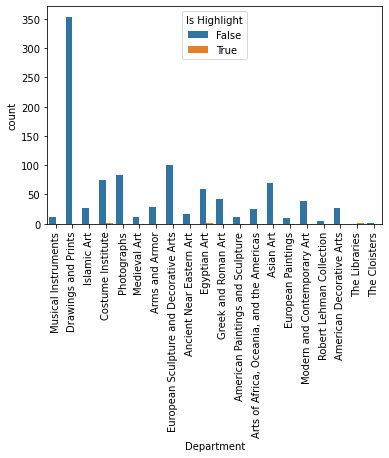

In [19]:
bar_plot_features(met, "Department")

Great for seeing the distribution of features, but need a function that will account for the class imbalances. Let's define one that compares the target:non-target ratio to the ratio of representation of each value in a certain feature. 

In [20]:
 def feature_ratio_plot(df, feature):
    feature_df = pd.DataFrame(df[feature].unique(), columns = ['name'])
    feature_df['ratio'] = feature_df['name'].\
            apply(lambda x: df[feature].value_counts()[x] / len(df[feature]))
    
    plt.figure(dpi=80)
    g = sns.barplot(feature_df.name, feature_df.ratio, data = feature_df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    g.set(xlabel=feature, ylabel = "Ratio")
    g.axhline(target_ratio, label = 'Target: Non-target ratio')
    g.set(ylim=(0, 0.10))
    g.set_title(f"{feature} vs. Ratio in Collection")
    g.figure.savefig(f"{feature} vs. Ratio in Collection.png", bbox_inches='tight')
    plt.legend(loc='upper right')
    plt.show(); 

Also good to have a function that returns a df with the top n frequently observed values in the feature, and all else labeled as "Other". Default n is 10 (so we would be graphing 11 values). 

In [21]:
def feature_top_10(feature, n = 10):
    top_10 = met[feature].value_counts()[:n].index

    met_feature = met.copy()
    met_feature[feature] = met[feature].\
            apply(lambda x: x if x in top_10 else "Other")
    return met_feature

And one function that combines the two: 

In [22]:
def feature_graph(feature, n = 10): 
    df = feature_top_10(feature, n) 
    feature_ratio_plot(df, feature) 

### Possible features ###

**Department**

In [23]:
met.Department.value_counts()

Drawings and Prints                          154445
European Sculpture and Decorative Arts        42528
Asian Art                                     36727
Photographs                                   36258
Costume Institute                             33681
Egyptian Art                                  27542
Greek and Roman Art                           17292
Islamic Art                                   15082
Modern and Contemporary Art                   13991
Arms and Armor                                13486
Arts of Africa, Oceania, and the Americas     12427
American Decorative Arts                      12330
Medieval Art                                   7343
Ancient Near Eastern Art                       6185
American Paintings and Sculpture               5451
Musical Instruments                            5303
European Paintings                             2760
The Cloisters                                  2628
Robert Lehman Collection                       2589
The Librarie

In [24]:
met.groupby("Department")["Is Highlight"].value_counts()

Department                                 Is Highlight
American Decorative Arts                   False            12265
                                           True                65
American Paintings and Sculpture           False             5344
                                           True               107
Ancient Near Eastern Art                   False             6110
                                           True                75
Arms and Armor                             False            13432
                                           True                54
Arts of Africa, Oceania, and the Americas  False            12323
                                           True               104
Asian Art                                  False            36672
                                           True                55
Costume Institute                          False            33574
                                           True               107
Drawings and Prints 

Looks like "Drawing and Prints" is one of the largest departments at the museum by object but not as highly represented in the "Is Highlight" target. Same goes for "European Sculpture and Decorative Arts" for example. And even though "Islamic Art"is not a large department by object ratio, it is one of the highest representations in the "Is Highlight" target. 

Finally let's look at the Libraries Department, as it seems to have the highest ratio(1!) of objects held to being highlighted or not. 

In [25]:
met[met.Department == "The Libraries"]

Object Number  Is Highlight  Is Public Domain  Object ID  \
379607             125.97 D932          True              True     591824   
379608            131.1M58 C75          True              True     591825   
379609              175T49 R43          True              True     591826   
379610                 120 Se6          True              True     591827   
379611           120.32P17 P17          True              True     591828   
...                        ...           ...               ...        ...   
447087       N6659.P32 A4 1976          True             False     747798   
447776  NK1700 .I57 Q v.1 1900          True              True     749358   
447777  NK1700 .I57 Q v.2 1901          True              True     749368   
447778     107.1 K75 1920 no.8          True              True     749370   
447905        NC765 .A9 1683 Q          True             False     749592   

           Department Object Name  \
379607  The Libraries         NaN   
379608  The Libraries         NaN   
379609  The Libraries         NaN   
379610  The Libraries         NaN   
379611  The Libraries         NaN   
...               ...         ...   
447087  The Libraries         NaN   
447776  The Libraries         NaN   
447777  The Libraries         NaN   
447778  The Libraries         NaN   
447905  The Libraries         NaN   

                                                    Title  \
379607  "Alberti Dvreri pictoris et architecti praesta...   
379608  Vita di Michelagnolo Buonarroti raccolta per A...   
379609                                Vita del Tintoretto   
379610  Bononiensis de architectura libri quinque quib...   
379611  I quattro libri dell'architettura di Andrea Pa...   
...                                                   ...   
447087                                 Lygia Pape : obras   
447776                               Das Interieur (1900)   
447777                               Das Interieur (1901)   
447778  Messrs. M. Knoedler & Co. announce an exhibiti...   
447905  Les proportions du corps humain, mesurées sur ...   

                                         Culture Period Dynasty  ...  \
379607  Paris: Officina Christiani Wecheli, 1535    NaN     NaN  ...   
379608       Rome: Antonio Blado, 1553 (1st ed.)    NaN     NaN  ...   
379609                      Venice: Oddoni, 1642    NaN     NaN  ...   
379610                                       NaN    NaN     NaN  ...   
379611      Venice: Domenico de'Franceschi, 1570    NaN     NaN  ...   
...                                          ...    ...     ...  ...   
447087                                       NaN    NaN     NaN  ...   
447776                                       NaN    NaN     NaN  ...   
447777                                       NaN    NaN     NaN  ...   
447778                                       NaN    NaN     NaN  ...   
447905                                       NaN    NaN     NaN  ...   

       Subregion Locale Locus Excavation River Classification  \
379607       NaN    NaN   NaN        NaN   NaN            NaN   
379608       NaN    NaN   NaN        NaN   NaN            NaN   
379609       NaN    NaN   NaN        NaN   NaN            NaN   
379610       NaN    NaN   NaN        NaN   NaN            NaN   
379611       NaN    NaN   NaN        NaN   NaN            NaN   
...          ...    ...   ...        ...   ...            ...   
447087       NaN    NaN   NaN        NaN   NaN            NaN   
447776       NaN    NaN   NaN        NaN   NaN            NaN   
447777       NaN    NaN   NaN        NaN   NaN            NaN   
447778       NaN    NaN   NaN        NaN   NaN            NaN   
447905       NaN    NaN   NaN        NaN   NaN            NaN   

       Rights and Reproduction  \
379607                     NaN   
379608                     NaN   
379609                     NaN   
379610                     NaN   
379611                     NaN   
...                        ...   
447087                     NaN

Since the Department has only 155 objects listed in this dataset(the libraries have a lot of objects usually! and a quick search online reveals 'Watson Library is The Met's research library. With its collection of more than one million volumes...' and all of them are listed under 'Is Highlight' target, we can safely say that the only objects listed here are the ones that have been highlighted. Something to keep in mind.  

<AxesSubplot:>

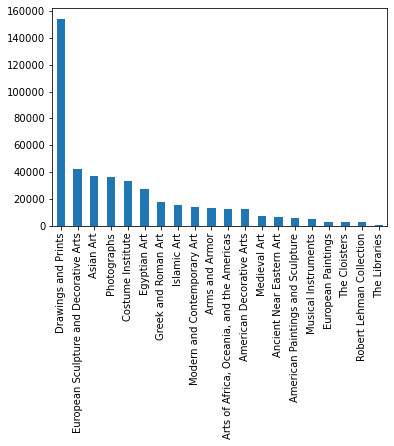

In [26]:
#sns.barplot(met.Department, hue = 'Is Highlight')
met.Department.value_counts().plot(kind='bar')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


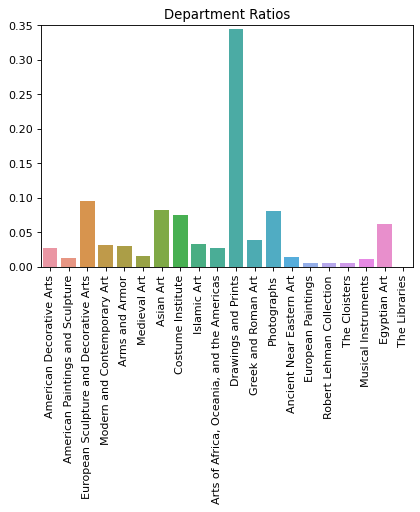

In [27]:
department_df = pd.DataFrame(met.Department.unique(), columns = ['name'])
department_df['ratio'] = department_df['name'].\
        apply(lambda x: met.Department.value_counts()[x] / len(met.Department))

plt.figure(dpi=80)
g = sns.barplot(department_df.name, department_df.ratio, data = department_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.axhline(target_ratio)
g.set(ylim=(0, 0.35))
g.set_title('Department Ratios')
g.set(xlabel= "", ylabel = "")

g.figure.savefig("department.png", bbox_inches='tight' )
plt.show()


**Object Name**

In [28]:
met["Object Name"].value_counts()

Print                                88972
Photograph                           28434
Drawing                              24966
Book                                 13412
Fragment                              9405
                                     ...  
Intaglio, portrait of Julia Domna        1
Earring reel with Nereid                 1
Relief of a woman and goat               1
Head of a youth ?                        1
Cast of the base of a seal               1
Name: Object Name, Length: 27037, dtype: int64

In [29]:
object_name_counts = met["Object Name"].value_counts().to_frame()
object_name_counts[object_name_counts["Object Name"] >200]

Object Name
Print                                            88972
Photograph                                       28434
Drawing                                          24966
Book                                             13412
Fragment                                          9405
...                                                ...
Cameo                                              218
Prints Collection Ornament & Architecture          218
Drum                                               215
Cape                                               214
Robe                                               211

[213 rows x 1 columns]

In [30]:
top_10 = met["Object Name"].value_counts()[:10].index
met_object_name = met.copy()
met_object_name["Object Name"] = met["Object Name"].\
        apply(lambda x: x if x in top_10 else "Other")
met_object_name["Object Name"].unique()

array(['Other', 'Drawing', 'Painting', 'Book', 'Bowl', 'Fragment',
       'Print', 'Photograph', 'Piece', 'Negative', 'Baseball card, print'],
      dtype=object)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


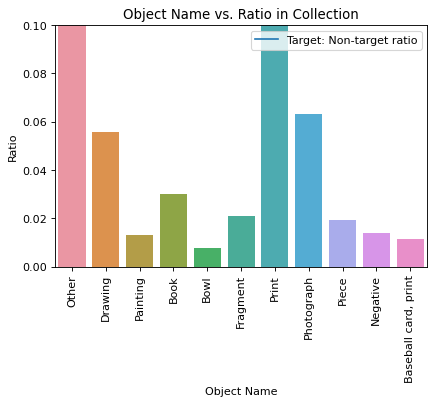

In [31]:
feature_ratio_plot(met_object_name, "Object Name")

**Artist Role**

In [32]:
met["Artist Role"].value_counts()

Artist                                                                                                    107849
Publisher                                                                                                  36087
Artist|Artist                                                                                              10727
Designer                                                                                                   10585
Artist|Publisher                                                                                           10559
                                                                                                           ...  
Author|Publisher|Sitter|Binder|Publisher                                                                       1
Author|Author|Publisher|Editor|Author|Illustrator|Illustrator|Illustrator|Sitter|Sitter|Artist|Printer         1
Author|Author|Publisher|Illustrator|Illustrator|Sitter|Editor|Author|Printer|Illustrator|Sitter|

In [33]:
artist_counts = met["Artist Role"].value_counts().to_frame()
artist_counts[artist_counts["Artist Role"] >200]

Artist Role
Artist                        107849
Publisher                      36087
Artist|Artist                  10727
Designer                       10585
Artist|Publisher               10559
...                              ...
Artist|Author|Publisher          213
Etcher|Artist                    213
Artist|Maker                     206
Artist and engraver              205
Modeler|Factory                  203

[62 rows x 1 columns]

In [34]:
artist_counts[artist_counts["Artist Role"] ==1]

Artist Role
Author|Engraver|Dedicatee|Printer                             1
Architect|Publisher|Lithographer                              1
Artist|Artist|Publisher|Sitter|Sitter|Sitter                  1
Engraver|Author|Editor|Publisher|Engraver|Engra...            1
Dedicatee|Author|Publisher|Author|Author|Author               1
...                                                         ...
Author|Publisher|Sitter|Binder|Publisher                      1
Author|Author|Publisher|Editor|Author|Illustrat...            1
Author|Author|Publisher|Illustrator|Illustrator...            1
Editor|Author|Publisher|Illustrator|Printer                   1
Artist|Engraver|Engraver|Engraver|Publisher                   1

[3902 rows x 1 columns]

Ok, looks like there are a lot of one off categorizations where the artist has a lot of roles and those are being all documented (3902 of them to be exact, of the 5664 different "Artist Roles"). Possibly, we could bin them as 'Various Roles.' (or people who were a lot of hats :)) 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


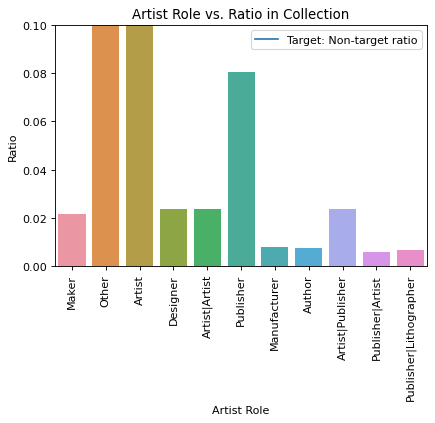

In [35]:
feature_graph("Artist Role")

**Artist Nationality**

In [36]:
met["Artist Nationality"].value_counts()

American                                                                                                                          63137
French                                                                                                                            18675
Italian                                                                                                                           12658
French|French                                                                                                                      9163
British                                                                                                                            8508
                                                                                                                                  ...  
Bohemian|British|British|Italian|Italian|Italian|Italian|British|Netherlandish|British|British|British|British|British|British        1
American|British|British, Scottish              

In [37]:
artist_nation_counts = met["Artist Nationality"].value_counts().to_frame()
artist_nation_counts[artist_nation_counts["Artist Nationality"] >200]

Artist Nationality
American                                                         63137
French                                                           18675
Italian                                                          12658
French|French                                                     9163
British                                                           8508
American|American                                                 7441
German                                                            7365
Japanese                                                          6259
Italian|Italian                                                   4528
French|French|French                                              4148
British|British                                                   2623
Dutch                                                             2447
Chinese                                                           2345
Austrian                                                          1462
Netherlandish                                                     1452
Spanish                                                           1277
German|German                                                     1249
British|British|British                                           1146
Netherlandish|Netherlandish                                       1057
American|American|American                                        1051
Italian|Italian|Italian                                            958
American, born Germany                                             943
Italian|French                                                     910
Netherlandish|Netherlandish|Netherlandish                          891
Canadian                                                           814
Bohemian                                                           750
French|Italian                                                     727
British, Scottish                                                  659
Spanish|French                                                     621
Russian                                                            531
French|French|French|French                                        516
Swiss                                                              514
Flemish                                                            449
Netherlandish|Netherlandish|Netherlandish|Nethe...                 440
British, Scottish|British, Scottish|British, Sc...                 419
American, born Russia                                              414
American, born Hungary                                             392
British|British|British|British                                    351
German|German|German                                               344
American, born England                                             341
Belgian                                                            335
Italian|Italian|Italian|Italian                                    323
Japanese|Japanese                                                  315
Danish                                                             277
American, born Britain                                             271
Mexican                                                            266
American                                                           266
French|Italian|Italian                                             266
Dutch|Dutch                                                        262
American, born Germany|American                                    257
French, born Russia                                                256
French|Dutch                                                       255
American, born France                                              240
Czech                                                              211
American|American|American|American                                205

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


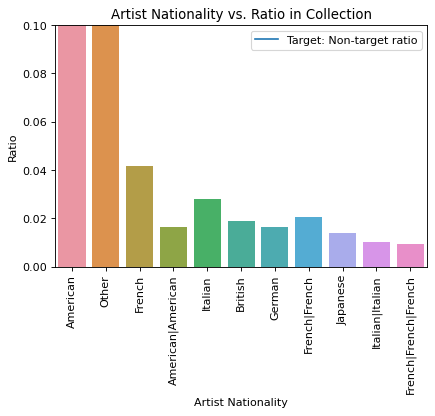

In [38]:
feature_graph("Artist Nationality")

**Object Date**

In [39]:
met["Object Date"]

0             1853
1             1901
2          1909–27
3          1909–27
4          1909–27
            ...   
448198    ca. 1550
448199        1624
448200    ca. 1600
448201    ca. 1720
448202         NaN
Name: Object Date, Length: 448203, dtype: object

In [40]:
met["Object Date"].sample(5)

44761            500 B.C.–A.D. 300
7593                      ca. 1880
328550                 ca. 1425–50
421017                        1866
205071    ca. 9th–7th century B.C.
Name: Object Date, dtype: object

Let's do a function to turn the years into integers. We're going to ignore ranges, and take the first year that we see for any given object. And then we will turn that into an integer so we can see how the years correlate with our target. 
Let's first define a function that does this and then apply it to the "Object Date" column. 

In [41]:
def find_year(year_str):   
    year_str = str(year_str)
    year_4d = re.findall((r'\b([0-9]{4})\b'), year_str)
    find = re.compile(r"^[^th century]*")
    year_century = re.search(find, year_str).group(0)
  
    if len(year_4d) >0: 
        year_4d = year_4d[0]
        year = year_4d
    elif ((year_century.isdigit()) & (len(year_century) == 2)): 
        year = year_century + "00"
    else: 
        year = "0" 
    
    if len(year) > 4: 
        year = year[:4]
        
    return int(year)

In [42]:
find_year("late 1st century B.C.–early 1st century A.D.")

0

In [43]:
met["Object Year"] = met["Object Date"].apply(lambda x: find_year(x))

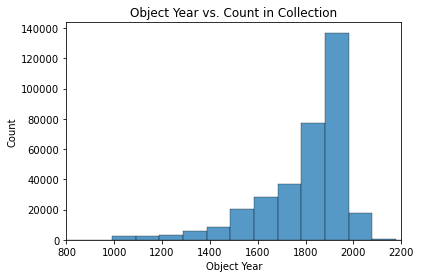

In [44]:
g = sns.histplot(data = met, x = "Object Year", bins = 100)
plt.xlim(800, 2200)
g.set_title("Object Year vs. Count in Collection")
g.figure.savefig("Object Year vs. Count in Collection.png")

In [45]:
met.astype({"Object Year": 'int64'}).dtypes

Object Number              object
Is Highlight                 bool
Is Public Domain             bool
Object ID                   int64
Department                 object
Object Name                object
Title                      object
Culture                    object
Period                     object
Dynasty                    object
Reign                      object
Portfolio                  object
Artist Role                object
Artist Prefix              object
Artist Display Name        object
Artist Display Bio         object
Artist Suffix              object
Artist Alpha Sort          object
Artist Nationality         object
Artist Begin Date          object
Artist End Date            object
Object Date                object
Object Begin Date           int64
Object End Date             int64
Medium                     object
Dimensions                 object
Credit Line                object
Geography Type             object
City                       object
State         

**Medium**

In [46]:
met.Medium.value_counts()

Commercial color lithograph                                  20209
Etching                                                      15038
Albumen photograph                                           10389
Engraving                                                     9723
Gelatin silver print                                          8961
                                                             ...  
Carved and gilded limewood; marble top                           1
Carved, painted, and gilded pine; gilt-bronze; marble top        1
Painted and varnished pine, ivory knobs on drawers               1
Bronze-gilt, hard-paste porcelain                                1
Stipple engraving, etching and engraving.                        1
Name: Medium, Length: 61445, dtype: int64

The rest of the plots can be seen at the bottom of the notebook in one place altogether. 

**Credit Line** 

Would be great to have but let's see if it has (distinct) enough info/ non-null or categories with it. 

In [47]:
met["Credit Line"].unique()

array(['Gift of Heinz L. Stoppelmann, 1979',
       'Gift of Heinz L. Stoppelmann, 1980',
       'Gift of C. Ruxton Love, Jr., 1967', ...,
       'Gift of Mr. and Mrs. Stuart P. Feld, 1993',
       'Gift of Lilian Randall, 1998',
       'Gift of Frances Carol Mills Clark, 1990'], dtype=object)

In [48]:
met["Credit Line"].nunique()

37116

Seems like too many different donors; might be hard to categorize. 

**Classification**

In [49]:
met.Classification.value_counts()

Prints                                       69260
Prints|Ephemera                              30033
Photographs                                  26821
Drawings                                     25230
Books                                        14685
                                             ...  
Prints|Drawings|Books                            1
Books|Manuscripts|Ornament & Architecture        1
Ornament & Architecture|Books                    1
Albums|Books                                     1
Paper-Documents|Prints                           1
Name: Classification, Length: 1077, dtype: int64

In [50]:
met.Classification.unique()

array(['Metal', 'Silver', 'Glass', ...,
       'Books|Ornament & Architecture|Manuscript Materials',
       'Books|Portraits', 'Paper-Documents|Prints'], dtype=object)

In [51]:
class_counts = met.Classification.value_counts().to_frame()
class_counts[class_counts.Classification >200]

Classification
Prints                               69260
Prints|Ephemera                      30033
Photographs                          26821
Drawings                             25230
Books                                14685
...                                    ...
Transparencies                         207
Papyrus                                204
Costumes                               204
Metalwork-Silver-Miniature             203
Manuscript Materials                   203

[154 rows x 1 columns]

**Country** 

This might be an important feature.

In [52]:
met.Country.value_counts()

Egypt                         30914
United States                  8501
Iran                           5886
Peru                           3422
Byzantine Egypt                1673
                              ...  
posssibly Gaul                    1
Rome                              1
Italy or present-day Spain        1
Northern Switzerland              1
Italy|Italy                       1
Name: Country, Length: 1035, dtype: int64

In [53]:
met.Country.nunique()

1035

In [54]:
country_values = met.Country.value_counts().to_frame()
country_values[country_values.Country >25]

Country
Egypt                 30914
United States          8501
Iran                   5886
Peru                   3422
Byzantine Egypt        1673
...                     ...
Brazil                   29
Hungary                  28
Iran or Iraq             28
probably Syria           26
present-day Greece       26

[96 rows x 1 columns]

**Culture**

In [55]:
met.Culture.value_counts()

American                       22167
French                         18224
Japan                          16374
China                          13844
Italian                         6580
                               ...  
German, Weimar                     1
American Eskimo (Alaska)           1
possibly German, Königsberg        1
Russian (Petrograd)                1
French, presumably Paris           1
Name: Culture, Length: 7101, dtype: int64

In [56]:
culture_values = met.Culture.value_counts().to_frame()
culture_values[culture_values.Culture >200]

Culture
American                    22167
French                      18224
Japan                       16374
China                       13844
Italian                      6580
...                           ...
Vicús                         209
Peru; north coast (?)         209
Indonesia (Central Java)      208
India (Gujarat)               206
European, Eastern             202

[81 rows x 1 columns]

# Plots #

All Graphs together to see each feature analyzed above, seeing which rise highly above our 'baseline' highlight:non-highlight ratio calculated above. 

In [57]:
features = ["Department", "Object Name", \
            "Artist Role", "Artist Nationality", "Medium", "Classification", "Country", "Culture"]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


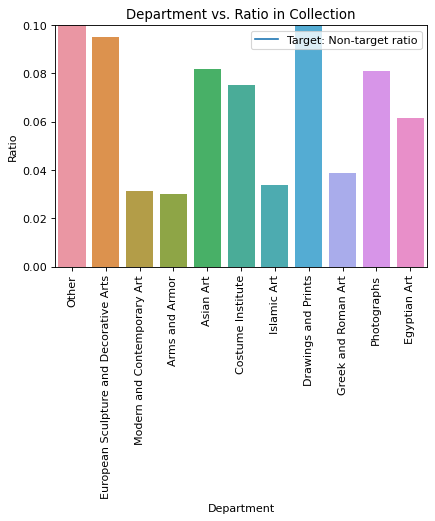

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


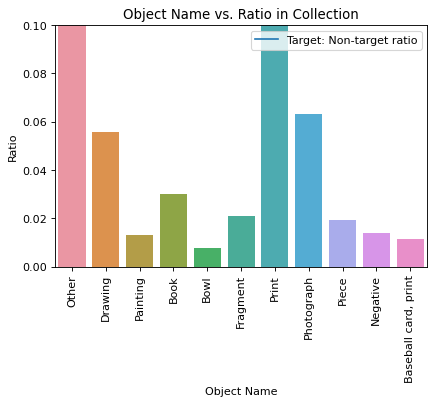

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


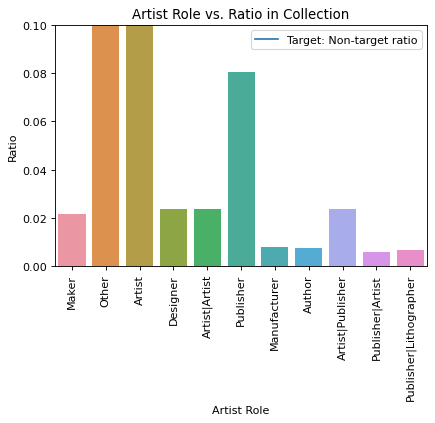

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


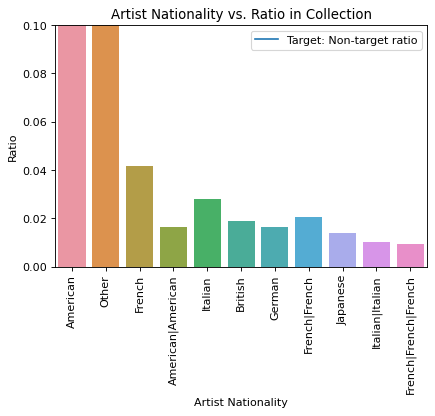

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


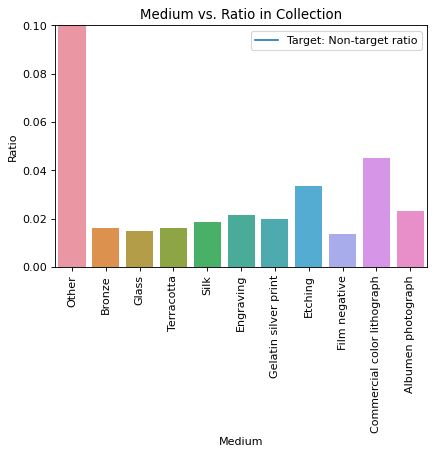

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


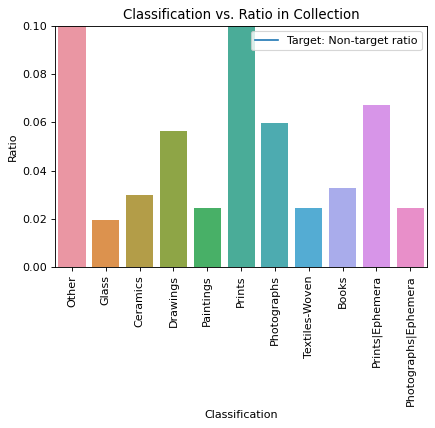

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


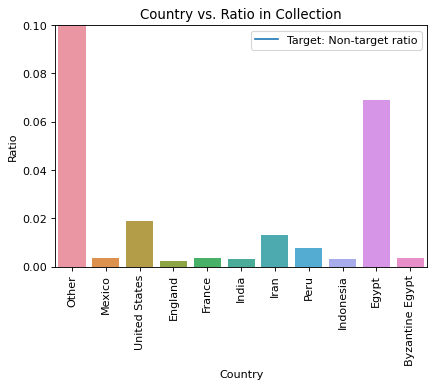

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


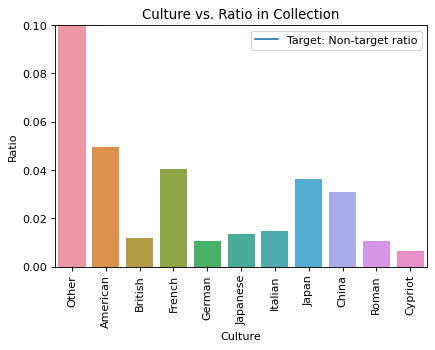

In [58]:
for i in features: 
    feature_graph(i)